a) Choosing a Method: Heuristic or ML?

# Heuristic Approach:

Pros: Simple to implement, interpretable, and useful for small datasets with clear patterns. A heuristic approach can be based on known characteristics of SMA changes during a maneuver, such as sudden variations in the rate of change.

Cons: Might not generalize well to more complex data, requires careful tuning of thresholds, and can miss less obvious maneuvers.

# ML Approach:

Pros: More powerful for finding complex, non-linear relationships between variables. Can generalize better with more data and can capture less obvious patterns.

Cons: Requires labeled data for training, higher computational cost, and more complex to interpret.


#For this problem:
 Since the data is unlabeled and only SMA variations are available, the heuristic approach may be more suitable. A heuristic method can quickly flag potential maneuvers by detecting sudden changes in the SMA and its rate of change, which is characteristic of engine burns or other adjustments.

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv("/content/SMA_data.csv")

In [80]:
df

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858
...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732


#EDA

In [81]:
df.head(5)

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858


In [82]:
df.tail(10)

,Datetime,SMA
2281,2019-12-28 11:30:59.056416,6872.936212
2282,2019-12-28 19:27:07.596576,6872.935250
2283,2019-12-29 03:26:27.041856,6872.934438
2284,2019-12-29 11:26:29.845248,6872.933145
2285,2019-12-29 19:24:11.718144,6872.931731
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732
2290,2019-12-31 18:43:37.271136,6872.922860


In [83]:
df.describe()

,SMA
count,2291.000000
mean,6867.611447
std,4.251829
min,6863.806871
25%,6864.211480
50%,6864.558916
75%,6872.988868
max,6873.482523


In [84]:
df.isnull()

,Datetime,SMA
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2286,False,False
2287,False,False
2288,False,False
2289,False,False


In [85]:
df.isnull().sum()

,0
Datetime,0
SMA,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


In [87]:
# Convert to datetime and sort by Datetime
# Convert to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Sort by Datetime
df = df.sort_values('Datetime')

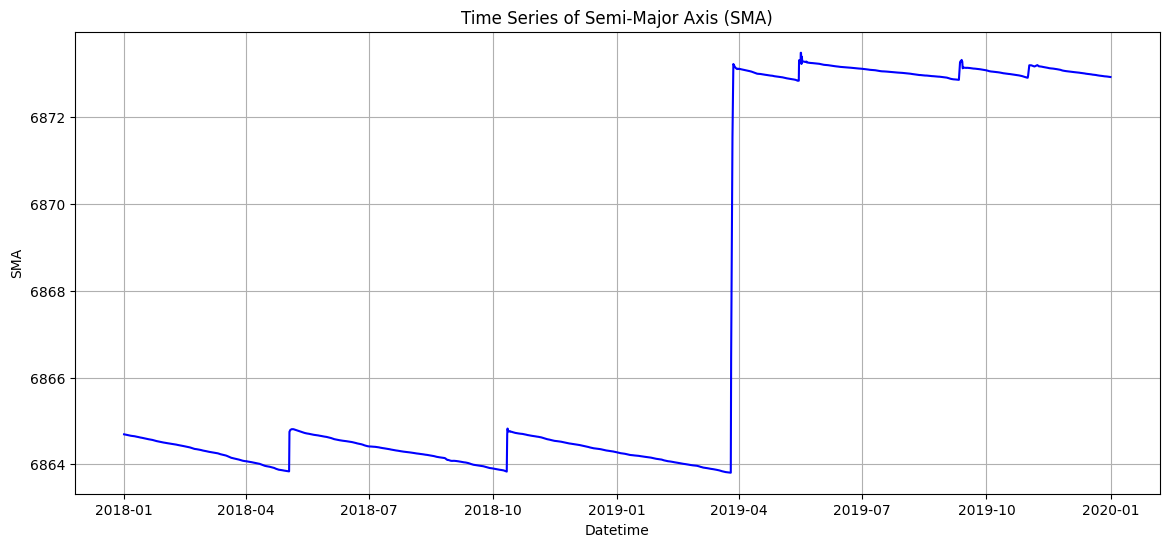

In [88]:
# Plot SMA over time
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['SMA'], label='Semi-Major Axis (SMA)', color='blue')
plt.title('Time Series of Semi-Major Axis (SMA)')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.grid(True)
plt.show()

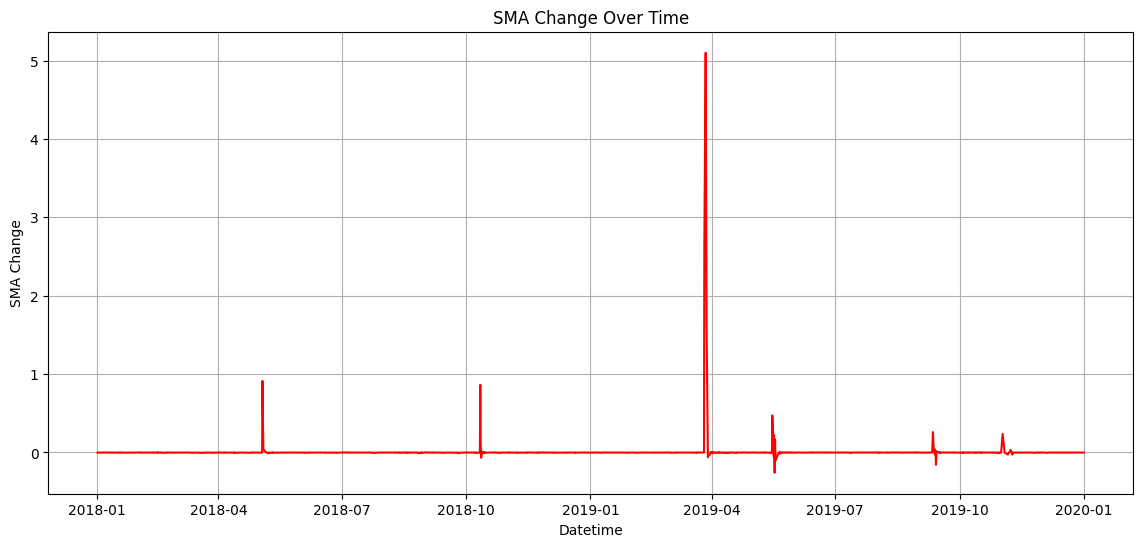

In [89]:
#  Calculate and Plot SMA Change Over Time
df['SMA_Change'] = df['SMA'].diff()
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['SMA_Change'], label='SMA Change', color='red')
plt.title('SMA Change Over Time')
plt.xlabel('Datetime')
plt.ylabel('SMA Change')
plt.grid(True)
plt.show()

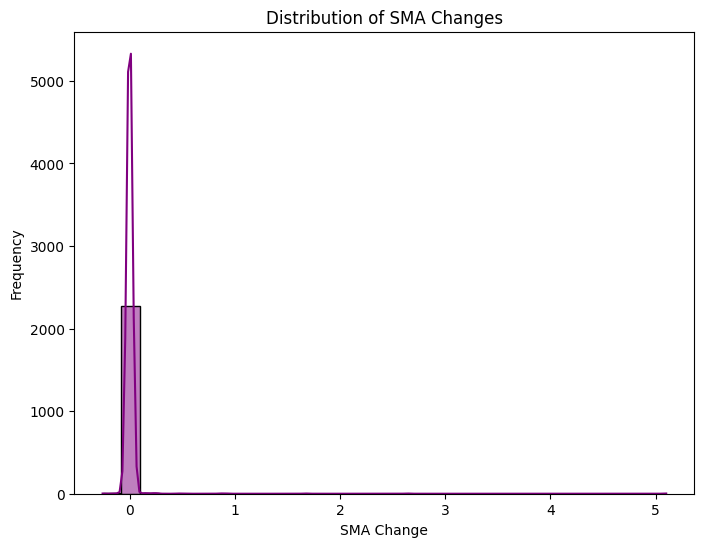

In [90]:
# Histogram of SMA Change
plt.figure(figsize=(8, 6))
sns.histplot(df['SMA_Change'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of SMA Changes')
plt.xlabel('SMA Change')
plt.ylabel('Frequency')
plt.show()

In [91]:
rolling_mean = df['SMA'].rolling(window=30).mean()
rolling_std = df['SMA'].rolling(window=30).std()


In [92]:
rolling_mean

,SMA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2286,6872.948570
2287,6872.947255
2288,6872.945944
2289,6872.944590


In [93]:
rolling_std

,SMA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2286,0.011494
2287,0.011457
2288,0.011416
2289,0.011565


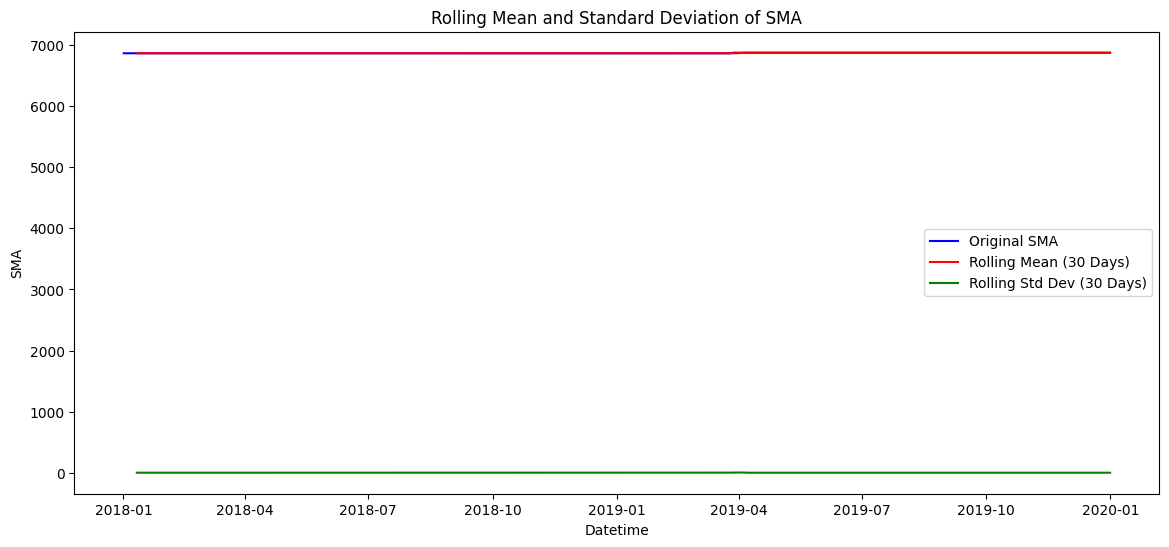

In [94]:
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['SMA'], label='Original SMA', color='blue')
plt.plot(df['Datetime'], rolling_mean, label='Rolling Mean (30 Days)', color='red')
plt.plot(df['Datetime'], rolling_std, label='Rolling Std Dev (30 Days)', color='green')
plt.title('Rolling Mean and Standard Deviation of SMA')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.legend()
plt.show()


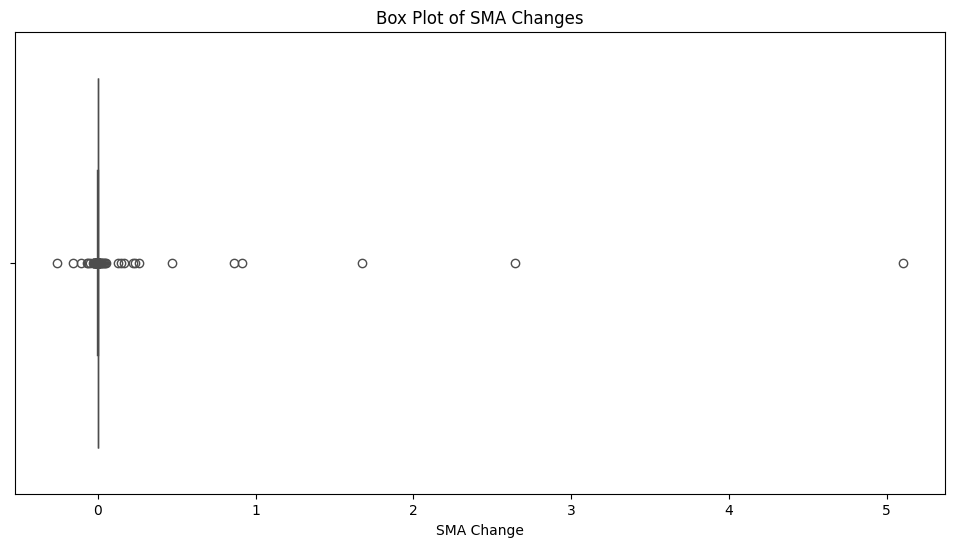

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['SMA_Change'].dropna(), color='cyan')
plt.title('Box Plot of SMA Changes')
plt.xlabel('SMA Change')
plt.show()

In [96]:
# Heatmap of Correlation
 # Feature Extraction: Calculate Rate of Change of SMA
df['SMA_Rate_Change'] = df['SMA_Change'].diff()

correlation_matrix = df[['SMA', 'SMA_Change', 'SMA_Rate_Change']].corr()

In [97]:
correlation_matrix

,SMA,SMA_Change,SMA_Rate_Change
SMA,1.000000,0.022996,-0.019146
SMA_Change,0.022996,1.000000,0.458747
SMA_Rate_Change,-0.019146,0.458747,1.000000


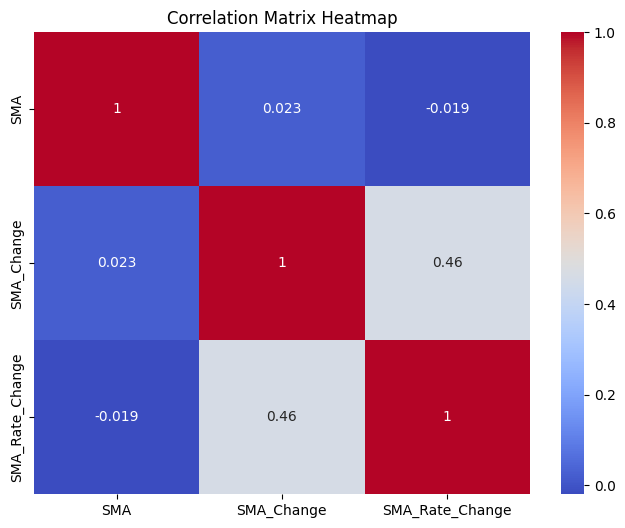

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

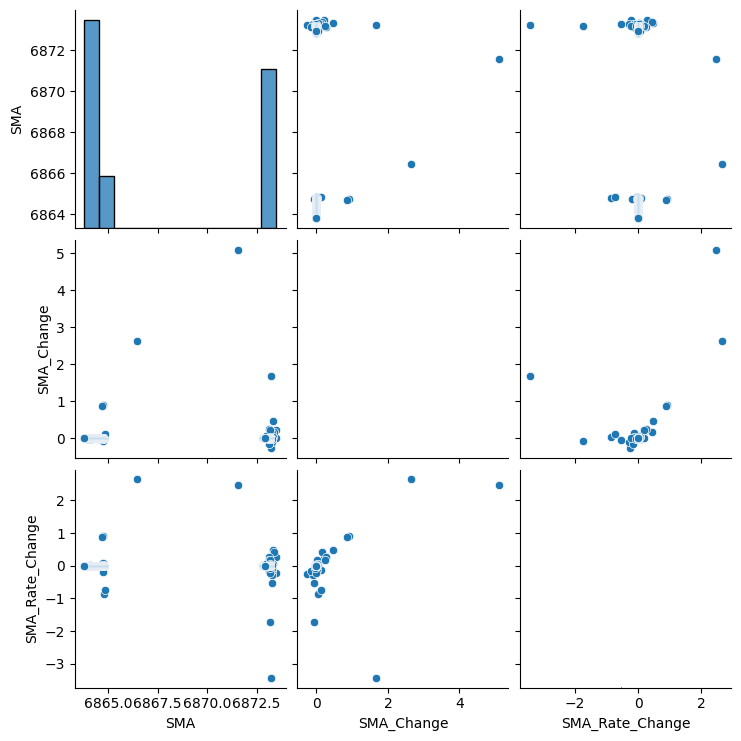

In [99]:
# Additional EDA: Pairplot (Scatterplot Matrix)
sns.pairplot(df[['SMA', 'SMA_Change', 'SMA_Rate_Change']].dropna())
plt.show()

In [100]:
# Additional EDA: Autocorrelation Plot
from pandas.plotting import autocorrelation_plot

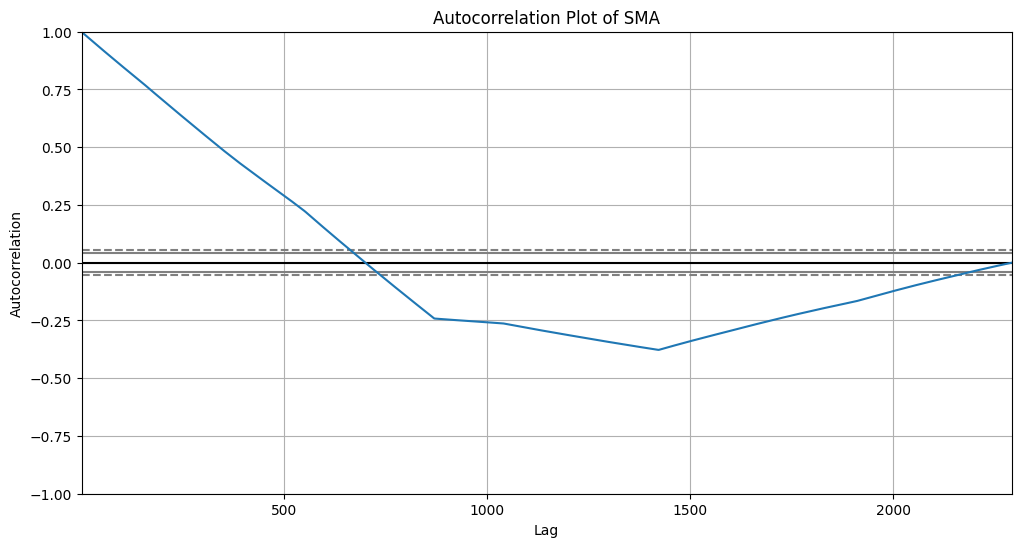

In [101]:
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['SMA'].dropna())
plt.title('Autocorrelation Plot of SMA')
plt.show()

In [102]:
# Feature Extraction: Calculate Rate of Change of SMA Change
df['SMA_Rate_Change'] = df['SMA_Change'].diff()

In [103]:
# Heuristic Maneuver Detection
# Set a threshold for maneuver detection (3 * standard deviation)
threshold = df['SMA_Rate_Change'].std() * 3



In [104]:
# Flag potential maneuvers where the rate of change exceeds the threshold
df['Maneuver'] = np.where(abs(df['SMA_Rate_Change']) > threshold, 1, 0)

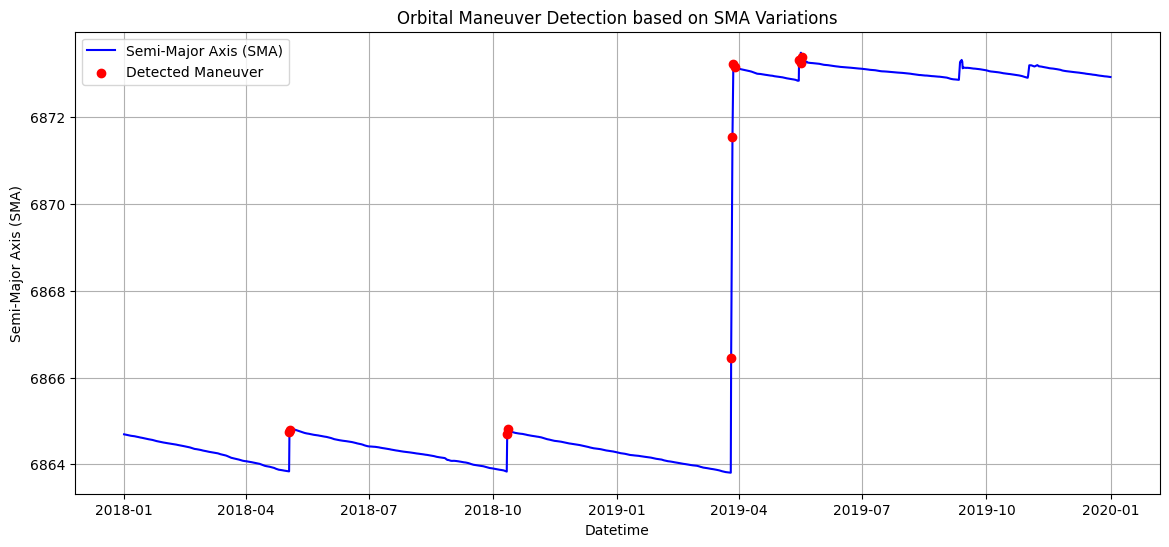

In [105]:
# Plotting Results with Detected Maneuvers
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['SMA'], label='Semi-Major Axis (SMA)', color='blue')
maneuver_dates = df[df['Maneuver'] == 1]['Datetime']
plt.scatter(maneuver_dates, df[df['Maneuver'] == 1]['SMA'], color='red', label='Detected Maneuver', zorder=5)
plt.title('Orbital Maneuver Detection based on SMA Variations')
plt.xlabel('Datetime')
plt.ylabel('Semi-Major Axis (SMA)')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# Output the detected potential maneuvers for validation
detected_maneuvers = df[df['Maneuver'] == 1][['Datetime', 'SMA']]
print("Detected Potential Maneuvers:")
print(detected_maneuvers)

Detected Potential Maneuvers:
                       Datetime          SMA
384  2018-05-03 12:01:31.056960  6864.749568
385  2018-05-04 03:52:43.845312  6864.792684
871  2018-10-11 13:37:04.556640  6864.695930
872  2018-10-11 19:59:53.915424  6864.824196
1421 2019-03-26 04:53:33.243936  6866.447702
1422 2019-03-27 04:34:36.436800  6871.548711
1423 2019-03-27 20:25:37.599168  6873.222542
1424 2019-03-28 20:04:36.873696  6873.161641
1583 2019-05-15 10:44:36.864096  6873.309430
1584 2019-05-16 13:35:18.235392  6873.256948
1588 2019-05-17 11:36:17.564832  6873.391750


In [108]:
detected_maneuvers=pd.read_csv("/content/detected_maneuvers.csv")

In [109]:
detected_maneuvers

,Datetime,SMA
0,2018-05-03 12:01:31.056960,6864.749568
1,2018-05-04 03:52:43.845312,6864.792684
2,2018-10-11 13:37:04.556640,6864.695930
3,2018-10-11 19:59:53.915424,6864.824196
4,2019-03-26 04:53:33.243936,6866.447702
5,2019-03-27 04:34:36.436800,6871.548711
6,2019-03-27 20:25:37.599168,6873.222542
7,2019-03-28 20:04:36.873696,6873.161641
8,2019-05-15 10:44:36.864096,6873.309430
9,2019-05-16 13:35:18.235392,6873.256948
